# Fortsetzung statistische Prozesskontrolle (SPC)


In [2]:
#Nötige Module importieren
#Dateien einlesen
import pandas as pd
#Plotten
import matplotlib.pyplot as plt
import seaborn as sns
#Numerische Operationen
import numpy as np
#Statistisches Werkzeug
from scipy import stats
import statsmodels.api as sm


## 1. Erstellung von Regelkarten für Median und Range
Mittelwert und Standardabweichung sind keine robusten Parameter, da sie sensitiv auf Ausreißer reagieren. Manchmal ist es besser robuste Parameter zu überwachen.

Folgende Kombinationen von Regelkarten sind üblich:
- Mittelwertkarte und Standardabweichungskarte: Formeln in letzter Laboranleitung
- Mediankarte und Rangekarte (beides robuste Parameter)


Eingriffsgrenzen:
- Median: $x_{med}\pm \tilde{A}_2 \cdot \bar{R}$ (A2 aus Tabelle, $\bar{R}$ = Durchschnittliche Spannweite)
- Range: $UCL = D_4 \cdot \bar{R}$, $LCL = D_3 \cdot \bar{R}$ (D4, D3 aus Tabelle, $\bar{R}$ = Durchschnittliche Spannweite)


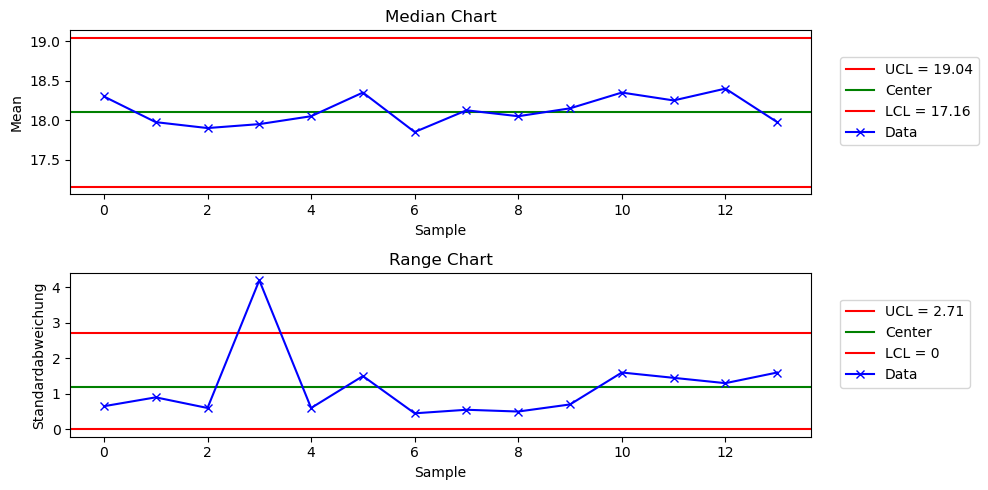

In [3]:
# TODO: Regelkarten für Median und Range erstellen und Unterschiede beobachten
data=pd.read_csv("ikosaeder.csv", delimiter=";", decimal=",")
melted_data = pd.melt(data)
ranges = []

for _,row in data.iterrows():
    row = np.sort(row)
    ranges.append(row[3] - row[0])

range_mean = np.mean(ranges)
median = np.median(melted_data.value)
medians = data.T.median()

LSL_median = median - (0.796 * range_mean)
USL_median = median + (0.796 * range_mean)

USL_range = 2.282 * range_mean
LSL_range = 0





fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].set_title("Median Chart")
axs[0].axhline(USL_median,color='r',label='UCL = {}'.format(np.round(USL_median,2)))
axs[0].axhline(median,color='g',label="Center")
axs[0].axhline(LSL_median,color='r',label='LCL = {}'.format(np.round(LSL_median,2)))
axs[0].plot(medians,'bx-',label="Data")
axs[0].set_ylabel("Mean")
axs[0].set_xlabel("Sample")
axs[0].legend(loc=(1.04,0.3))

axs[1].set_title("Range Chart")
axs[1].axhline(USL_range,color='r',label='UCL = {}'.format(np.round(USL_range,2)))
axs[1].axhline(range_mean,color='g',label="Center")
axs[1].axhline(LSL_range,color='r',label='LCL = {}'.format(np.round(LSL_range,2)))
axs[1].plot(ranges,'bx-',label="Data")
axs[1].set_ylabel("Standardabweichung")
axs[1].set_xlabel("Sample")
axs[1].legend(loc=(1.04,0.3))





plt.tight_layout() # kein Overlap der Beschriftungen der verschiedenen Plots
plt.show()




## 2. Regelkarten im Normalbetrieb

Es gibt verschiedene zusätzliche Regeln, die in der Industrie gängig sind (z.B. Western Electric Rules).

Um ein Gespür für Regelkarten zu bekommen, füllen Sie Ihre Regelkarten mit verschiedenen zufälligen Werten ähnlicher Art
1. normalverteilte Zufallszahlen mit gleichem Mittelwert und gleicher Standardabweichung nutzen (Annahme Daten waren normalverteilt)
2. Zufallszahlen selbst gewählter Verteilung mit gleichem Mittelwert und gleicher Standardabweichung

Beobachten Sie:
- Wie häufig werden die Kontrollgrenzen verletzt? 
- Welche Vorteile und Nachteile haben weitere Kontrollregeln wie die Western Electric Rules?
- Welche Unterschiede sehen Sie in der Kombination $\bar{x}$-$S$-Karte vs. $x_{med}$-$R$-karte?



In [8]:
# TODO: Regelkarten mit zufälligen Werten füllen und beobachten was passiert


for _ in range(10):
    tmp = np.random.normal(loc=melted_data.value.mean(), scale=np.mean(data.T.std()), size=4)

data_neu=pd.concat([data,pd.DataFrame(tmp,columns=data.columns.values)],ignore_index=True)




ValueError: Shape of passed values is (4, 1), indices imply (4, 4)

#### Kontrollfrage

Stellen Sie sich folgendes Szenario vor:
Laut Arbeitsanweisung ist bei einer Verletzung der Eingriffsgrenze/Kontrollgrenze der Prozess stoppen und ein/e Ingenieur\*in zurate ziehen. Vor der Anlage stehen aber sehr viele Lose zur Bearbeitung. Der/die Fertigungsmitarbeiter*in trägt den Wert nicht ein, sondern misst so oft bis die Messung einen Wert liefert, der innerhalb der Grenzen liegt. Wozu führt das?


In [5]:
#TODO: Diskussion

## 3. Statistische Prozesskontrolle für die Lebensdauer

Auf moodle liegt eine Datei mit Messdaten für Biegezyklen von Büroklammern. Es wurden jeweils Stichproben einer Größe von 7 Büroklammern entnommen. Die Büroklammern halten laut Hersteller im Belastungstest mind. 2 Biegezyklen. Erstellen Sie eine Prozessübersicht für diese Daten. Folgende Kennzahlen und Graphen sollten enthalten sein:
- Histogramm und QQ-Plot
- Regelkarten: $\bar{}x$/$S$-Karte bzw. $x_{med}$/$R$-Karte (begründete Wahl)
- Berechnung Prozessfähigkeit

Bewerten Sie den Prozess!

In [6]:
# TODO: Prozessübersicht erstellen und Prozess bewerten